In [1]:
!conda install seaborn --force --yes

Fetching package metadata ...............
Solving package specifications: .

Package plan for installation in environment C:\Users\sspiegel\AppData\Local\ESRI\conda\envs\my_arcgispro-py3:

The following NEW packages will be INSTALLED:

    seaborn: 0.9.0-py36_0

seaborn-0.9.0-   0% |                              | ETA:  --:--:--   0.00  B/s
seaborn-0.9.0-   4% |#                              | ETA:  0:00:00   0.00  B/s
seaborn-0.9.0-   8% |##                             | ETA:  0:00:00   0.00  B/s
seaborn-0.9.0-  12% |###                            | ETA:  0:00:00   1.59 MB/s
seaborn-0.9.0-  16% |#####                          | ETA:  0:00:00   1.40 MB/s
seaborn-0.9.0-  21% |######                         | ETA:  0:00:00   1.05 MB/s
seaborn-0.9.0-  25% |#######                        | ETA:  0:00:00   1.26 MB/s
seaborn-0.9.0-  29% |#########                      | ETA:  0:00:00   1.47 MB/s
seaborn-0.9.0-  33% |##########                     | ETA:  0:00:00   1.68 MB/s
seaborn-0.9.0-  3

In [8]:


import arcpy
import os
import glob



In [4]:
path = os.getcwd()

In [5]:
path


'D:\\Advanced_Class\\jupyter_stuff\\Week_10'

In [13]:
landsat_folder = glob.glob('*.tar')

In [14]:
landsat_folder

['LC08_L1TP_045032_20180608_20180615_01_T1.tar']

In [15]:
landsat_folder = os.path.join(path,landsat_folder[0])

In [16]:
landsat_folder

'D:\\Advanced_Class\\jupyter_stuff\\Week_10\\LC08_L1TP_045032_20180608_20180615_01_T1.tar'

In [17]:
single_raster = os.path.join(landsat_folder,"LC08_L1TP_045032_20180608_20180615_01_T1_MTL.txt")

In [18]:
single_raster

'D:\\Advanced_Class\\jupyter_stuff\\Week_10\\LC08_L1TP_045032_20180608_20180615_01_T1.tar\\LC08_L1TP_045032_20180608_20180615_01_T1_MTL.txt'

In [19]:
raster_info = arcpy.Describe(single_raster)
print(raster_info.format)
print(raster_info.spatialReference.name)

AFR
WGS_1984_UTM_Zone_10N


In [20]:
myRaster = arcpy.RasterToNumPyArray(single_raster)

In [21]:


myRaster.shape



(8, 7861, 7731)

In [22]:

myRasterInfo = arcpy.Raster(single_raster)
mx = myRasterInfo.extent.XMin + myRasterInfo.meanCellWidth
my = myRasterInfo.extent.YMin + myRasterInfo.meanCellHeight
print("Cell Size = " + str(myRasterInfo.meanCellWidth))

Cell Size = 30.0


In [23]:
import matplotlib.pyplot as plt

In [24]:
%matplotlib notebook

In [27]:


#plt.imshow(myRaster[0,:,:])
#plt.colorbar()



<IPython.core.display.Javascript object>


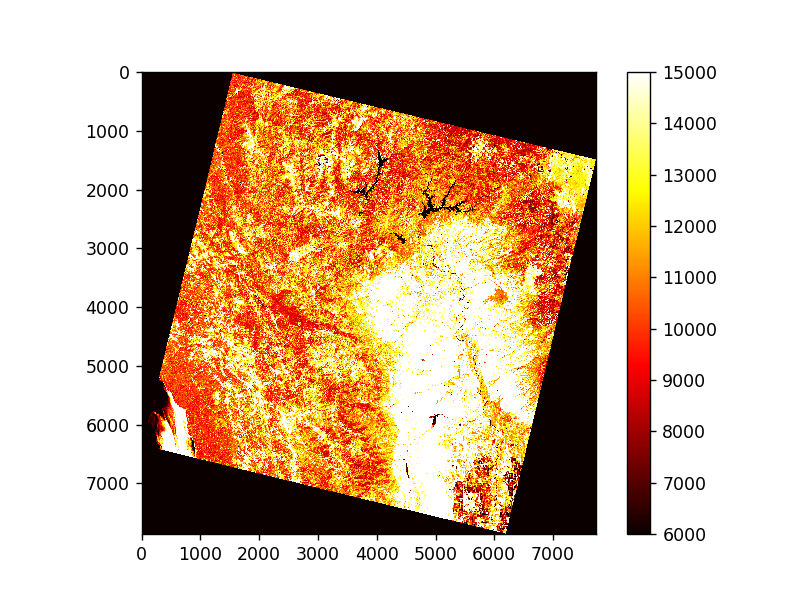

In [33]:


plt.imshow(myRaster[5,:,:], cmap="hot", clim=(6000, 15000)) #'nipy_spectral'
plt.colorbar()



In [39]:
ndvi = (myRaster[4,:,:] - myRaster[3,:,:])/(myRaster[4,:,:] + myRaster[3,:,:])

C:\Users\sspiegel\AppData\Local\ESRI\conda\envs\my_arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


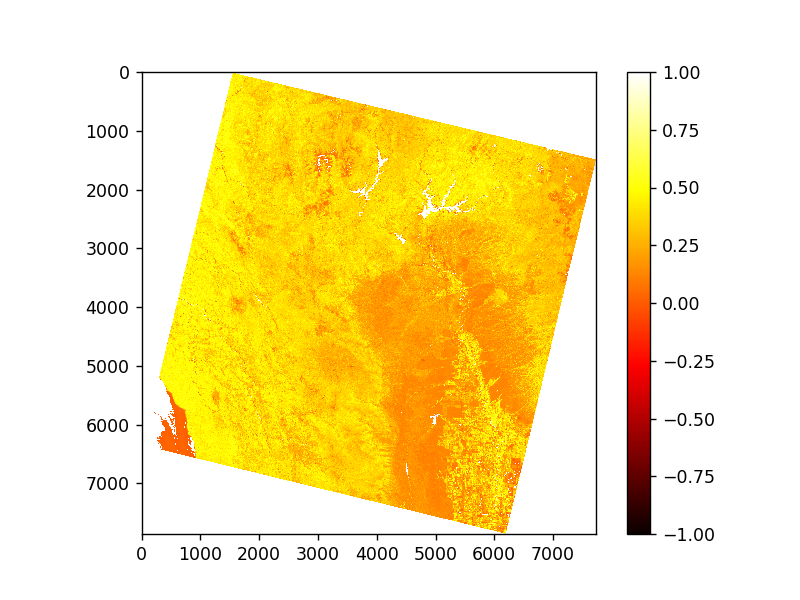

In [40]:
plt.imshow(ndvi, cmap="hot", clim=(-1,1)) #'nipy_spectral'
plt.colorbar()

In [41]:
output_ras = arcpy.NumPyArrayToRaster(ndvi,arcpy.Point(mx, my),
                                                  myRasterInfo.meanCellWidth,
                                                  myRasterInfo.meanCellHeight)

In [42]:
output_ras.save("ndvi.tif")